# Linear Regression - Diabetes Analysis

### 📘 Historical Review and Uses of Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is based on the premise that there is a linear relationship between the variables, which means it can be represented by a linear equation.

After researching the history of linear regression, I found information about its origins and evolution.
It seems that the first person to study this type of predictive model was [Sir Francis Galton](https://www.britannica.com/biography/Francis-Galton) in the 19th century. It appears that his first paper mentioning the topic was published in 1886 and is titled "Regression Towards Mediocrity in Hereditary Stature".

In addition to Sir Galton, the French mathematician [Adrien-Marie Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre) presented a paper on the subject called "Nouvelles méthodes pour la détermination des orbites des comètes" published in 1806. Although Legendre's focus was the study of orbits, in the end it can be seen that his work was fundamental to the development of linear regression in modern statistics.

Linear regression is used to **predict missing or future values** of a variable, based on its relationship with other variables. It assumes a linear relationship between the independent variable(s) and the dependent variable.


---

In [61]:
import pandas as pd
# read the df from the diabetes.csv file
diabetes_df = pd.read_csv('diabetes.csv')
# print the first 5 rows of the dataframe
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Preproceso de datos y limpieza de datos

In [ ]:
# in this case we use amputation to remove the rows with missing values

# clean data, if glucose is 0, drop the row
diabetes_df = diabetes_df[diabetes_df['Glucose'] != 0]
# if insulin is 0, drop the row
diabetes_df = diabetes_df[diabetes_df['Insulin'] != 0]

### Correlograma

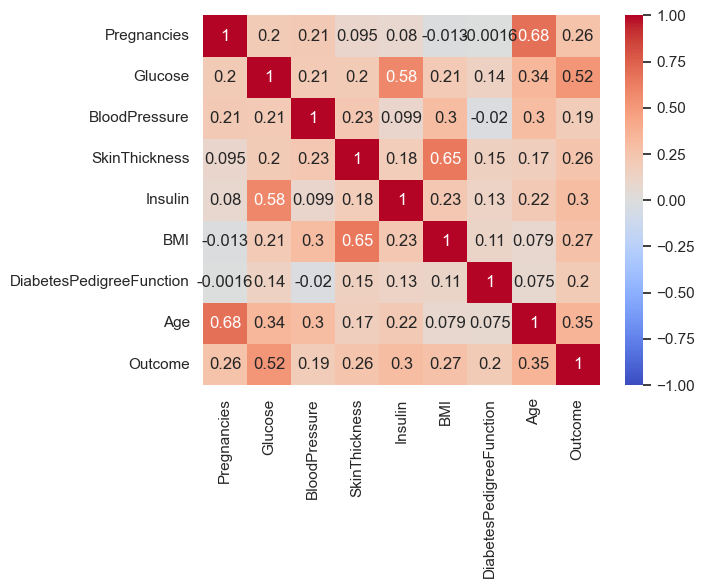

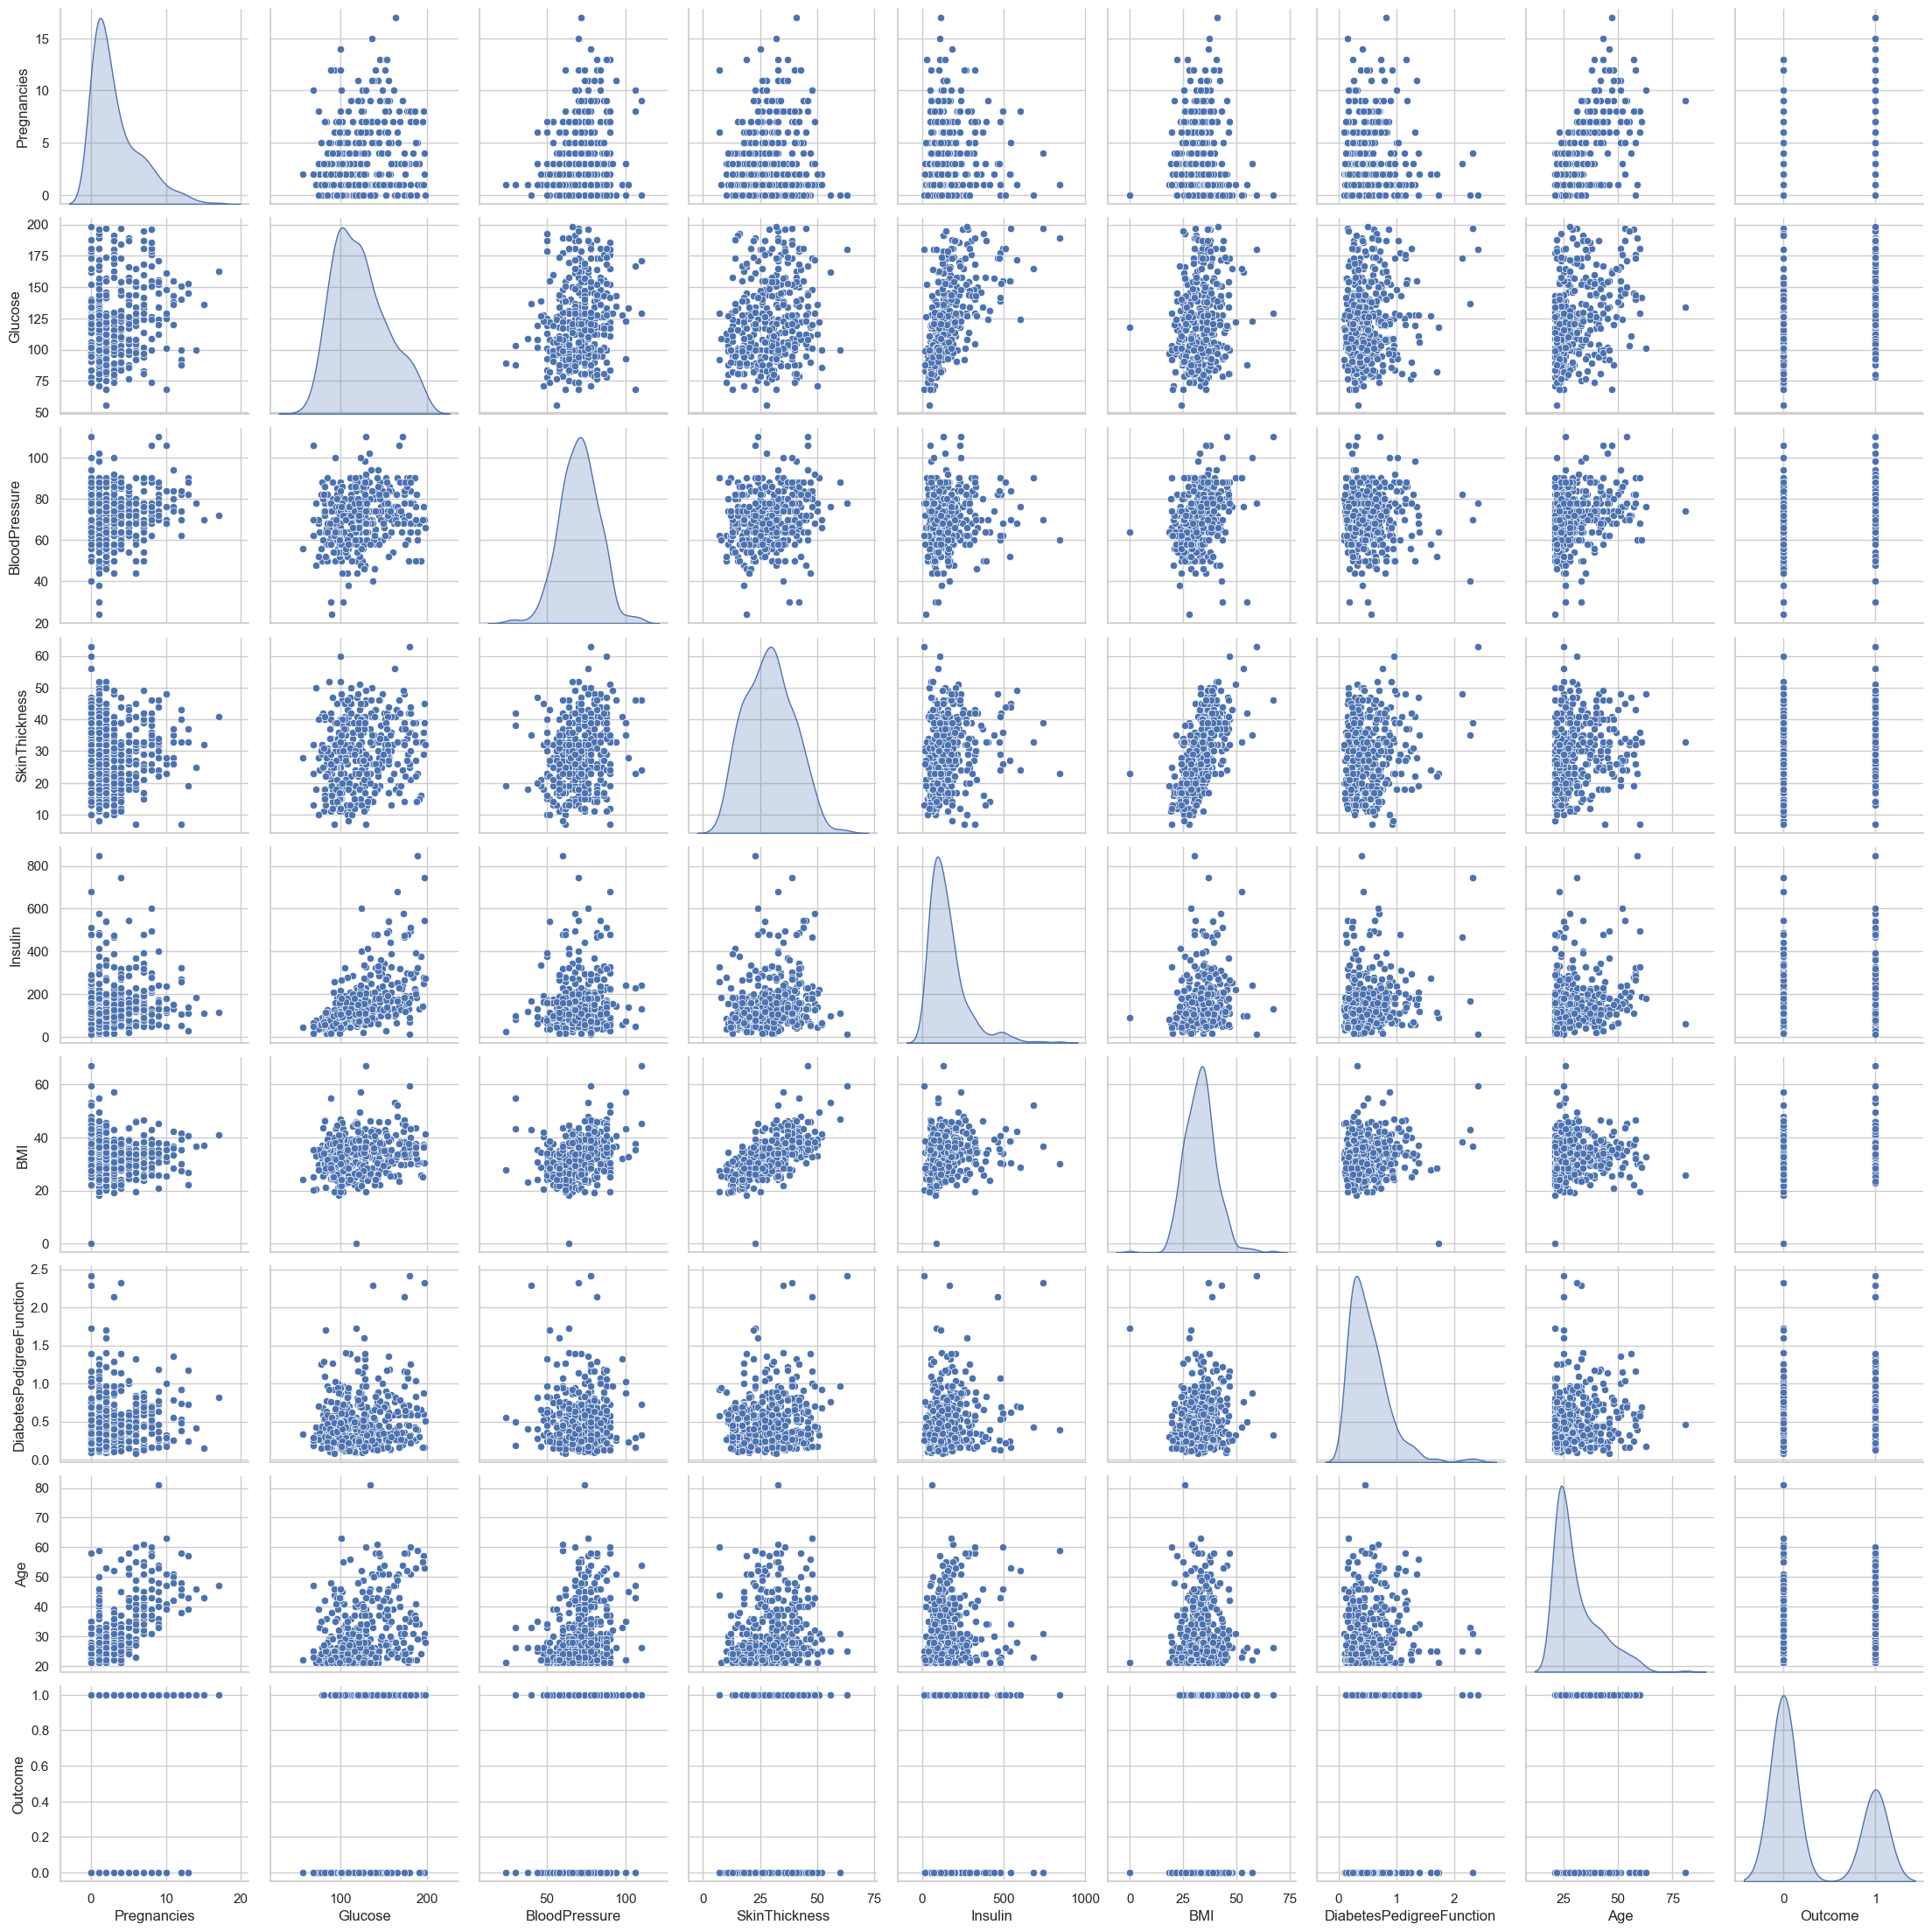

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computa la matriz de correlación
corr = diabetes_df.corr() # pima es un dataframe
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Densidad
sns.pairplot(diabetes_df, diag_kind="kde")

### Top 3 Variables with the Highest Correlation with Insulin

In [64]:
# to extract the 3 variables with the highest correlation with insulin first I will fetch the correlation values
# of all variables with respect to insulin
insulin_corr = corr['Insulin'].sort_values(ascending=False)
print(insulin_corr)
# now I extract the top 3 variables with the highest correlation with insulin
top_3_insulin_corr = insulin_corr[1:4].index.tolist()
print(top_3_insulin_corr)

Insulin                     1.000000
Glucose                     0.581186
Outcome                     0.302128
BMI                         0.226756
Age                         0.218125
SkinThickness               0.182886
DiabetesPedigreeFunction    0.128827
BloodPressure               0.099203
Pregnancies                 0.080322
Name: Insulin, dtype: float64
['Glucose', 'Outcome', 'BMI']


## Linear Regression Model

Now we perform a linear regression analysis using glucose as the independent variable and insulin as the dependent variable.

In [65]:
from sympy import * # symbols

def regresion_lineal(datos, independent_variable, dependent_variable):
    n = len(datos)
    x_media = datos[independent_variable].mean()
    y_media = datos[dependent_variable].mean()
    a = 0
    for i in range(n):
        a += ((datos[independent_variable].values)[i] - x_media) * ((datos[dependent_variable].values)[i] - y_media)
    a /= (n*datos[independent_variable].var())
    
    b = y_media - a * x_media
    
    return a * Symbol(independent_variable) + b

## Application of the method using "lsd.dat" data

In [66]:
import pandas as pd
datos = pd.read_csv('http://www.stat.ufl.edu/~winner/data/lsd.dat', delimiter='\s+', header=None)
datos.columns = ['x', 'y']
datos

,x,y
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


In [67]:
model = regresion_lineal(datos, 'x', 'y')
print(model)

83.5471979235859 - 7.7223997845401*x


## Application of the method using "diabetes.csv" data

In [68]:
# split the data into training and test sets
diabetes_df = diabetes_df.sample(frac=1).reset_index(drop=True) # shuffle the data
training_set, test_set = diabetes_df[:int(len(diabetes_df)*0.8)], diabetes_df[int(len(diabetes_df)*0.8):]

# train the model using the training set
model = regresion_lineal(training_set, 'Glucose', 'Insulin')
print("model:", model) # model as the format 2.27621371026141*Glucose - 125.345568467012

# test the model using the test set
predictions = []
for i in range(len(test_set)):
    x = test_set['Glucose'].values[i]
    y = test_set['Insulin'].values[i]
    prediction = model.evalf(subs={Symbol('Glucose'): x})
    predictions.append(prediction)
    print(f"Real: {y}, Predicted: {prediction}")


model: 2.08794274864385*Glucose - 100.375764411501
Real: 112, Predicted: 152.265308174405
Real: 543, Predicted: 310.948957071337
Real: 231, Predicted: 168.968850163555
Real: 54, Predicted: 87.5390829664453
Real: 32, Predicted: 81.2752547205137
Real: 110, Predicted: 160.617079168980
Real: 495, Predicted: 277.541873093036
Real: 272, Predicted: 216.991533382364
Real: 94, Predicted: 106.330567704240
Real: 215, Predicted: 158.529136420336
Real: 50, Predicted: 72.9234837259383
Real: 171, Predicted: 216.991533382364
Real: 300, Predicted: 267.102159349816
Real: 105, Predicted: 158.529136420336
Real: 64, Predicted: 116.770281447459
Real: 105, Predicted: 108.418510452884
Real: 130, Predicted: 158.529136420336
Real: 108, Predicted: 162.705021917624
Real: 59, Predicted: 87.5390829664453
Real: 474, Predicted: 260.838331103885
Real: 92, Predicted: 93.8029112123768
Real: 46, Predicted: 108.418510452884
Real: 115, Predicted: 75.0114264745822
Real: 49, Predicted: 100.066739458308
Real: 16, Predicted: 8

## Graphical representation of the model

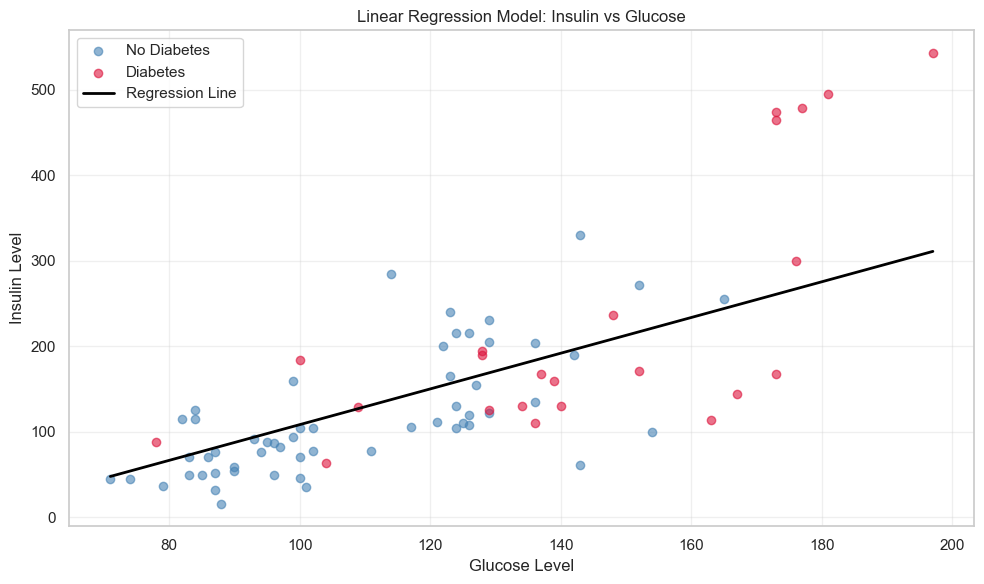

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color palette for diabetes outcomes
palette = {0: 'steelblue', 1: 'crimson'}

# Create a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot with points colored based on diabetes outcome
for outcome, color in palette.items():
    mask = test_set['Outcome'] == outcome
    plt.scatter(
        test_set.loc[mask, 'Glucose'], 
        test_set.loc[mask, 'Insulin'], 
        color=color, 
        alpha=0.6, 
        label=f'{"Diabetes" if outcome == 1 else "No Diabetes"}'
    )

# Generate points for the regression line
glucose_range = np.array([min(test_set['Glucose']), max(test_set['Glucose'])])
insulin_pred = [float(model.evalf(subs={Symbol('Glucose'): g})) for g in glucose_range]

# Plot the regression line
plt.plot(glucose_range, insulin_pred, color='black', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.title('Linear Regression Model: Insulin vs Glucose')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [70]:
# Calculate the total sum of squares (SST)
sum_of_squares_total = sum((test_set['Insulin'] - test_set['Insulin'].mean())**2)

# Calculate the residual sum of squares (SSR)
sum_of_squares_residual = sum((test_set['Insulin'] - predictions)**2)

# Calculate R-squared
r_squared = 1 - (sum_of_squares_residual / sum_of_squares_total)
print(f"R-squared (Accuracy): {r_squared}")

R-squared (Accuracy): 0.540673551872668


## Conclusion

### Explanation of the Model Results

The linear regression model was trained using glucose levels as the independent variable and insulin levels as the dependent variable. To evaluate the quality of the model, the coefficient of determination \( R^2 \) was calculated, which measures how well the model explains the variability of the data.

#### Results:
- **\( R^2 \):** 0.3144 (31.44%)

#### Interpretation:
1. **\( R^2 \):** An \( R^2 \) value of 0.3144 indicates that the model explains approximately 31.44% of the variability in insulin levels based on glucose levels. This means that only 31.44% of the variability is explained by the relationship between the two variables. This suggests that the model has very limited ability to predict insulin levels, as a large portion of the variability is not explained by the relationship between glucose and insulin.

#### Conclusion:
The model is not very effective at predicting insulin levels based solely on glucose levels. 

This could be because the relationship between these variables is not entirely linear or because other factors, such as Pregnancies, BloodPressure, SkinThickness, BMI, etc., may have greater importance than expected. These factors, which were not considered in the model, could be relevant and influence insulin levels.

It would be advisable to explore more complex models or include additional independent variables to improve the model's accuracy.